<a href="https://colab.research.google.com/github/noallynoclan/colab/blob/master/pandas_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import colors
# list of named colors - https://matplotlib.org/3.1.0/gallery/color/named_colors.html
# list of colormaps - https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html

# Bar

In [2]:
# simple table
np.random.seed(42)
df = pd.DataFrame({
    'region': ['APAC', 'EMEA', 'LATAM', 'NA'] * 3,
    'vertical': ['Ecomm', 'Retail', 'Services'] * 4,
    'rev_2019': 1e3 * np.random.randint(30, 60, 12),
    'rev_2020': 1e3 * np.random.randint(30, 70, 12)
}).sort_values(['region', 'vertical'])
df

df['share'] = df['rev_2019'] / df['rev_2019'].sum()
df['yoy_growth'] = df['rev_2020'] / df['rev_2019'] - 1
fmt = {'rev_2019': '${:,.0f}', 'rev_2020': '${:,.0f}', 'share': '{:.1%}', 'yoy_growth': '{:+.1%}'}
print('YoY growth')
display(df.style.format(fmt).bar(subset=['share', 'yoy_growth'], color=['orangered', 'dodgerblue'], align='zero'))

YoY growth


,region,vertical,rev_2019,rev_2020,share,yoy_growth
0,APAC,Ecomm,"$36,000","$40,000",6.4%,+11.1%
4,APAC,Retail,"$40,000","$69,000",7.1%,+72.5%
8,APAC,Services,"$36,000","$31,000",6.4%,-13.9%
9,EMEA,Ecomm,"$55,000","$53,000",9.8%,-3.6%
1,EMEA,Retail,"$49,000","$40,000",8.7%,-18.4%
5,EMEA,Services,"$37,000","$53,000",6.6%,+43.2%
6,LATAM,Ecomm,"$58,000","$32,000",10.3%,-44.8%
10,LATAM,Retail,"$48,000","$59,000",8.5%,+22.9%
2,LATAM,Services,"$58,000","$53,000",10.3%,-8.6%
3,NA,Ecomm,"$44,000","$65,000",7.8%,+47.7%


In [3]:
# pivot with margins
pt = df.pivot_table(['rev_2019', 'rev_2020'], 'region', aggfunc='sum', margins=True)
pt['share'] = pt['rev_2019'] / pt.loc['All', 'rev_2019'].sum()
pt['yoy_growth'] = pt['rev_2020'] / pt['rev_2019'] - 1
print('YoY growth')
display(pt.style.format(fmt).bar(subset=['share', 'yoy_growth'], color=['orangered', 'dodgerblue'], align='zero'))

YoY growth


,rev_2019,rev_2020,share,yoy_growth
region,,,,
APAC,"$112,000","$140,000",19.9%,+25.0%
EMEA,"$141,000","$146,000",25.0%,+3.5%
LATAM,"$164,000","$144,000",29.1%,-12.2%
NA,"$146,000","$183,000",25.9%,+25.3%
All,"$563,000","$613,000",100.0%,+8.9%


# Background Gardient

In [4]:
# simple gradient

def bg(s, df=None, low=None, high=None, cmap='Wistia'):
    from matplotlib import colors
    s = s if df is None else df[s.name].values
    low = low if low is not None else df.min().min() if df is not None else s.min()
    high = high if high is not None else df.max().max() if df is not None else s.max()
    normed = colors.Normalize(low, high)(s)#.replace(0, 1)
    c = [colors.rgb2hex(x) for x in plt.cm.get_cmap(cmap)(normed)]
    return ['background-color: %s' % color for color in c]

pt = df.pivot_table('rev_2020', 'region', 'vertical', aggfunc='sum')
print('Revenue by region and vertical')
display(pt.style.format('${:,.0f}').apply(bg, df=pt))

Revenue by region and vertical


vertical,Ecomm,Retail,Services
region,,,
APAC,"$40,000","$69,000","$31,000"
EMEA,"$53,000","$40,000","$53,000"
LATAM,"$32,000","$59,000","$53,000"
NA,"$65,000","$51,000","$67,000"


In [5]:
# using custom format and external table
pt = df.pivot_table('rev_2020', 'region', 'vertical', aggfunc='sum')
pt.applymap(lambda x: '{:,.0f}'.format(x).replace(',000', 'K')).style.apply(bg, df=pt)

vertical,Ecomm,Retail,Services
region,,,
APAC,40K,69K,31K
EMEA,53K,40K,53K
LATAM,32K,59K,53K
NA,65K,51K,67K


In [6]:
# gradient with margins 
pt = df.pivot_table('rev_2020', 'region', 'vertical', aggfunc='sum', margins=True) / df['rev_2020'].sum()
print('Revenue share by region and vertical')
display(pt.style.format('{:.1%}').apply(bg, low=0.05, high=0.2))

Revenue share by region and vertical


vertical,Ecomm,Retail,Services,All
region,,,,
APAC,6.5%,11.3%,5.1%,22.8%
EMEA,8.6%,6.5%,8.6%,23.8%
LATAM,5.2%,9.6%,8.6%,23.5%
NA,10.6%,8.3%,10.9%,29.9%
All,31.0%,35.7%,33.3%,100.0%


In [7]:
# custom colormap
cmap = colors.LinearSegmentedColormap.from_list("orlg", ["orangered", "white", "limegreen"])
pt = df.pivot_table(['rev_2019', 'rev_2020'], 'region', 'vertical', aggfunc='sum', margins=True) 
diff = pt['rev_2020'] / pt['rev_2019'] - 1
print('YoY growth by region and vertical')
display(diff.style.format('{:+.1%}').apply(bg, low=-1, high=1, cmap=cmap))

YoY growth by region and vertical


vertical,Ecomm,Retail,Services,All
region,,,,
APAC,+11.1%,+72.5%,-13.9%,+25.0%
EMEA,-3.6%,-18.4%,+43.2%,+3.5%
LATAM,-44.8%,+22.9%,-8.6%,-12.2%
NA,+47.7%,+2.0%,+28.8%,+25.3%
All,-1.6%,+17.1%,+11.5%,+8.9%


YoY growth by region and vertical


Text(33.0, 0.5, 'region')

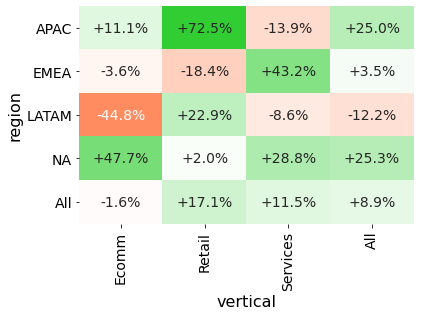

In [19]:
print('YoY growth by region and vertical')
ax = sns.heatmap(diff, annot=True, cmap=cmap, center=0, fmt='+.1%', annot_kws={'size': 14}, cbar=False);
ax.tick_params(axis='x', which='major', labelsize=14, rotation=90)
ax.tick_params(axis='y', which='major', labelsize=14, rotation=0)
ax.set_xlabel(ax.get_xlabel(), size=16)
ax.set_ylabel(ax.get_ylabel(), size=16)